In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
# getting data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [7]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 10s 0us/step


In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
#folders = glob('/data/train/*')
#print(len(folders))
# 2 class so class=2
classs=2  # output class 2

In [12]:
x = Flatten()(vgg.output)
prediction = Dense(classs, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
#from keras import optimizers


#adam = optimizers.Adam()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:

train_set = train_datagen.flow_from_directory(directory=train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(directory=validation_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [19]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel_vgg16.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\Users\asus\anaconda3\envs\SIFY\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 - 160s - loss: 10.8804 - accuracy: 0.5688 - val_loss: 6.1786 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 6.17864, saving model to mymodel_vgg16.h5
Epoch 2/10
5/5 - 159s - loss: 3.0761 - accuracy: 0.8125 - val_loss: 1.2345 - val_accuracy: 0.9141

Epoch 00002: val_loss improved from 6.17864 to 1.23445, saving model to mymodel_vgg16.h5
Epoch 3/10
5/5 - 186s - loss: 2.3997 - accuracy: 0.8250 - val_loss: 1.0626 - val_accuracy: 0.9355

Epoch 00003: val_loss improved from 1.23445 to 1.06262, saving model to mymodel_vgg16.h5
Epoch 4/10
5/5 - 196s - loss: 1.1027 - accuracy: 0.9250 - val_loss: 1.1410 - val_accuracy: 0.9365

Epoch 00004: val_loss did not improve from 1.06262
Epoch 5/10
5/5 - 204s - loss: 1.1689 - accuracy: 0.9062 - val_loss: 0.7091 - val_accuracy: 0.9521

Epoch 00005: val_loss improved from 1.06262 to 0.70911, saving model to mymodel_vgg16.h5
Epoch 6/10
5/5 - 212s - loss: 0.6587 - accuracy: 0.9500 - val_loss: 0.8290 - val_accuracy: 0.9482

Ep

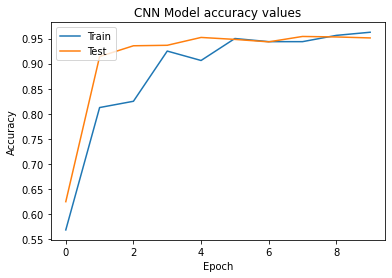

In [20]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [48]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('image\cat.4053.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = 'Cat'
    print(prediction)
else:
    prediction = 'Dog'
    print(prediction)

[[1.0000000e+00 6.8474403e-28]]
Cat


In [51]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
out_model = load_model('mymodel_vgg16.h5')


[[0. 1.]]
Dog


In [52]:
test_image = image.load_img('image\dog.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = out_model.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = 'Cat'
    print(prediction)
else:
    prediction = 'Dog'
    print(prediction)

[[0. 1.]]
Dog


In [25]:
'''
out=model.predict_classes(test_image)
print("Classes :",out)    # [0]--Cat   [1]--Dog

#training_set.class_indices
if out[0]==0:
    prediction = 'Cat'
    print(prediction)
else:
    prediction = 'Dog'
    print(prediction)  
'''

'\nout=model.predict_classes(test_image)\nprint("Classes :",out)    # [0]--Cat   [1]--Dog\n\n#training_set.class_indices\nif out[0]==0:\n    prediction = \'Cat\'\n    print(prediction)\nelse:\n    prediction = \'Dog\'\n    print(prediction)  \n'

In [45]:
''' from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
#res = load_model('sign_classifier_mobileNet_v2.h5')
res = tf.keras.models.load_model('mymodel_vgg16.h5',custom_objects={'KerasLayer':hub.KerasLayer})
res.summary()
'''

" from tensorflow.keras.preprocessing.image import img_to_array\nfrom tensorflow.keras.models import load_model\nimport tensorflow as tf\n#res = load_model('sign_classifier_mobileNet_v2.h5')\nres = tf.keras.models.load_model('mymodel_vgg16.h5',custom_objects={'KerasLayer':hub.KerasLayer})\nres.summary()\n"